In [3]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot
from datetime import datetime
import plotly
import plotly.graph_objs as go
import numpy as np

In [6]:

#dow = pd.read_csv("data_gathering/data/DJI.csv")
btc = pd.read_csv("data_gathering/data/BTC.csv")

In [4]:
from IPython.display import HTML
plotly.tools.set_credentials_file(username="AndyVu-Hoang", api_key="9Ut7brZV1YJ1eDk0aNyw")

In [4]:
btc.tail()

,Date,BITSTAMP,COINBASE,ITBIT,KRAKEN,avg_btc_price_usd,price_usd
2400,4/9/2018,6839.423990,6854.045507,6883.028037,6844.344700,6855.210559,6855.210559
2401,4/10/2018,6786.642319,6791.874050,6779.679059,6780.155652,6784.587770,6784.587770
2402,4/11/2018,6894.958433,6893.791740,6886.717021,6887.136386,6890.650895,6890.650895
2403,4/12/2018,7548.015149,7546.063852,7476.781733,7542.264352,7528.281271,7528.281271
2404,4/13/2018,8035.266915,7998.148796,8016.838673,8003.545154,8013.449884,8013.449884


In [7]:
# the dates are in different formats
# converting to datetime
# dow['Date'] = pd.to_datetime(dow['Date'])
btc['Date'] = pd.to_datetime(btc['Date'])

In [8]:
btc_ts = btc[['price_usd']]
btc_ts.index = btc['Date']

In [9]:
btc_ts.index

DatetimeIndex(['2011-09-13', '2011-09-14', '2011-09-15', '2011-09-16',
               '2011-09-17', '2011-09-18', '2011-09-19', '2011-09-20',
               '2011-09-21', '2011-09-22',
               ...
               '2018-04-04', '2018-04-05', '2018-04-06', '2018-04-07',
               '2018-04-08', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13'],
              dtype='datetime64[ns]', name='Date', length=2405, freq=None)

In [10]:
btc_ts.price_usd

Date
2011-09-13       5.929231
2011-09-14       5.590798
2011-09-15       5.094272
2011-09-16       4.854515
2011-09-17       4.870000
2011-09-18       4.839576
2011-09-19       4.900000
2011-09-20       5.388054
2011-09-21       5.706075
2011-09-22       5.696960
2011-09-23       5.707099
2011-09-24       5.722494
2011-09-25       6.050000
2011-09-26       5.983073
2011-09-27       4.895402
2011-09-28       4.862498
2011-09-29       4.816345
2011-09-30            NaN
2011-10-01            NaN
2011-10-02            NaN
2011-10-03       4.847772
2011-10-04       4.924737
2011-10-05       5.029419
2011-10-06       4.908846
2011-10-07       4.687629
2011-10-08       4.455536
2011-10-09       3.890000
2011-10-10       4.498302
2011-10-11       3.998965
2011-10-12       3.943964
                 ...     
2018-03-15    8067.795078
2018-03-16    8301.331495
2018-03-17    8039.581190
2018-03-18    7670.518666
2018-03-19    8383.159592
2018-03-20    8687.915179
2018-03-21    8965.557594
2018-03

In [15]:
py.iplot([go.Scatter(x=btc_ts.index, y=btc_ts.price_usd)])


In [16]:
# checking if certain months have better average prices for the year
btc_ts.index.month
month_avgs = []
for i in range(2012, 2019):
    months = list()
    for j in range(1,13):
        m_y = btc_ts[btc_ts.index.year==i]
        m = m_y[m_y.index.month==j]
        if(len(m.price_usd)!=0):
            avg = sum(m.price_usd)/len(m.price_usd)
            months.append(avg)
        else:
            months.append(0)
    month_avgs.append({'Year': i, 'January': months[0], 'February': months[1], 'March': months[2],
                      'April': months[3], 'May': months[4], 'June': months[5], 'July': months[6],
                      'August': months[7], 'September': months[8], 'October': months[9], 
                      'November': months[10], 'December': months[11]})

In [17]:
month_avgs = pd.DataFrame(month_avgs)

In [18]:
month_avgs.drop('Year', axis=1).rank(axis=1)

,April,August,December,February,January,July,June,March,May,November,October,September
0,2.0,8.0,12.0,4.0,6.0,7.0,5.0,1.0,3.0,9.0,11.0,10.0
1,9.0,5.0,12.0,2.0,1.0,4.0,6.0,3.0,7.0,11.0,10.0,8.0
2,5.0,7.0,1.0,11.0,12.0,10.0,9.0,8.0,6.0,3.0,2.0,4.0
3,3.0,7.0,12.0,1.0,6.0,10.0,5.0,9.0,4.0,11.0,8.0,2.0
4,4.0,6.0,12.0,1.0,2.0,10.0,8.0,3.0,5.0,11.0,9.0,7.0
5,4.0,8.0,12.0,2.0,1.0,6.0,7.0,3.0,5.0,11.0,10.0,9.0
6,9.0,4.5,4.5,11.0,12.0,4.5,4.5,10.0,4.5,4.5,4.5,4.5


Months that are later on in the year, such as October/November/December, seem to have higher rank. Although this is likely just due to the increasing trend of cryptocurrency.

In [19]:
month_avgs

,April,August,December,February,January,July,June,March,May,November,October,September,Year
0,4.965896,10.873603,13.135257,5.253617,6.210285,7.775188,5.961872,4.948944,5.042166,11.302019,11.580728,11.400267,2012
1,125.647351,103.386922,791.966258,25.741707,15.311842,85.356419,105.074970,56.956316,117.089728,524.572121,152.340199,124.629855,2013
2,463.320172,536.095398,343.271350,665.321186,821.757334,617.308501,614.445771,597.555200,483.792634,366.008265,364.137785,445.736664,2014
3,235.054794,252.569366,422.163076,233.167626,251.840768,279.640755,237.378826,268.402124,236.779634,347.978013,264.736040,233.892409,2015
4,433.844826,579.044451,821.156849,401.935362,411.403763,661.299670,639.400484,414.765630,460.487036,724.210465,640.967599,604.362367,2016
5,1212.385282,3836.256386,14904.144063,1059.535756,909.061716,2495.321295,2607.779323,1127.333906,1882.554626,7753.708621,5297.857584,4089.788818,2017
6,7031.768318,0.000000,0.000000,9360.001801,12854.472549,0.000000,0.000000,8992.810651,0.000000,0.000000,0.000000,0.000000,2018


In [12]:
# plotting an interactive plot
import plotly.plotly as py
py.iplot([go.Scatter(x=btc_ts.index, y=btc_ts.price_usd)])

In [13]:
# since there is a clear increasing trend, i want to try looking at the differenced data
def difference(data, lag=1):
    diff = list()
    for i in range(lag, len(data)):
        x = data[i] - data[i-lag]
        diff.append(x)
    return(pd.Series(diff))

In [22]:
# time series sucks for crypto, gonna try to use monte carlo simulations
btc.head()

,Date,BITSTAMP,COINBASE,ITBIT,KRAKEN,avg_btc_price_usd,price_usd
0,2011-09-13,5.929231,NaN,NaN,NaN,5.929231,5.929231
1,2011-09-14,5.590798,NaN,NaN,NaN,5.590798,5.590798
2,2011-09-15,5.094272,NaN,NaN,NaN,5.094272,5.094272
3,2011-09-16,4.854515,NaN,NaN,NaN,4.854515,4.854515
4,2011-09-17,4.870000,NaN,NaN,NaN,4.870000,4.870000


In [29]:
np.argwhere(np.isnan(df.price_usd))

array([[17],
       [18],
       [19],
       [32],
       [33],
       [35],
       [36],
       [39],
       [40],
       [44],
       [50],
       [51],
       [55],
       [71],
       [75],
       [82],
       [87],
       [95]], dtype=int64)

In [23]:
df = btc[['Date', 'price_usd']]

In [30]:
# selecting only rows where there are no NaN values
df1 = df[96:]
# setting date as index and date column
df1.index = df1['Date']
df1 = df1.drop('Date', 1)

In [31]:
df1['daily_return'] = np.zeros(len(df1))

In [32]:
df1

,price_usd,daily_return
Date,,
2011-12-18,3.397929,0.0
2011-12-19,3.809668,0.0
2011-12-20,4.570030,0.0
2011-12-21,4.380000,0.0
2011-12-22,4.183819,0.0
2011-12-23,4.186257,0.0
2011-12-24,4.330000,0.0
2011-12-25,4.303976,0.0
2011-12-26,4.296001,0.0


In [33]:
for i in range(len(df1)-1):
    df1.daily_return[i+1] = (df1.price_usd[i+1]-df1.price_usd[i])/df1.price_usd[i] 

In [34]:
df1.head()

,price_usd,daily_return
Date,,
2011-12-18,3.397929,0.000000
2011-12-19,3.809668,0.121174
2011-12-20,4.570030,0.199588
2011-12-21,4.380000,-0.041582
2011-12-22,4.183819,-0.044790


In [35]:
v = np.var(df1.daily_return)

In [36]:
m = np.mean(df1.daily_return)

In [37]:
# confirming that 0 is in the 95% confidence interval for the true mean of daily returns
from math import sqrt
[m - 1.96*sqrt(v), m + 1.96*sqrt(v)]

[-0.07917947702984521, 0.0877478970768944]

In [38]:
df1.iloc[-1]

price_usd       8013.449884
daily_return       0.064446
Name: 2018-04-13 00:00:00, dtype: float64

In [39]:
df1['daily_return'].head()

Date
2011-12-18    0.000000
2011-12-19    0.121174
2011-12-20    0.199588
2011-12-21   -0.041582
2011-12-22   -0.044790
Name: daily_return, dtype: float64

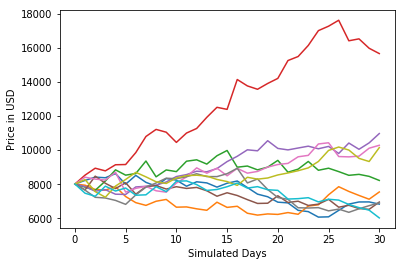

In [103]:
import matplotlib.pyplot as plt
from math import sqrt
numSim = 10
predDays = 30
lastPrice = df1.iloc[-1].price_usd
results = pd.DataFrame()
sim = 0

while (sim < numSim):
    prices = []
    days = 0
    prices.append(lastPrice)
    
    while (days < predDays):
        prices.append(prices[days] * (1 + np.random.normal(0, sqrt(v))))
        days += 1
    
    results[str(sim)] = pd.Series(prices).values
    sim += 1

# print(results.shape)
fig = plt.figure()
plt.plot(results)
plt.ylabel('Price in USD')
plt.xlabel('Simulated Days')
plt.show()

In [82]:
results.iloc[:,0].head()

0    8013.449884
1    7792.403544
2    7581.639617
3    7791.569410
4    7784.811089
Name: 0, dtype: float64

In [97]:
len(results.columns)

20

In [104]:
# making interactive plot
import plotly.plotly as py

# making a function to make lists for plotting
def results_to_list(results):
    l = []
    for i in range(len(results.columns)):
        x = go.Scatter(x=results.index, y=results.iloc[:,i])
        l.append(x)
    return(l)

mc_sims = results_to_list(results)

py.iplot(mc_sims)

In [112]:
# want to be able to toggle number of simulations, 